In [1]:
#Importing the required libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#set the Working Directory
os.chdir("C:\\Users\\Ramya\\Desktop\\cabfare")
os.getcwd()

'C:\\Users\\Ramya\\Desktop\\cabfare'

In [3]:
# Importing the data
train = pd.read_csv('train_cab.csv')
test = pd.read_csv('test.csv')
data=[train,test]
for i in data:
    i['pickup_datetime']  = pd.to_datetime(i['pickup_datetime'],errors='coerce')
train.head(5)

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1.0


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16067 entries, 0 to 16066
Data columns (total 7 columns):
fare_amount          16043 non-null object
pickup_datetime      16066 non-null datetime64[ns, UTC]
pickup_longitude     16067 non-null float64
pickup_latitude      16067 non-null float64
dropoff_longitude    16067 non-null float64
dropoff_latitude     16067 non-null float64
passenger_count      16012 non-null float64
dtypes: datetime64[ns, UTC](1), float64(5), object(1)
memory usage: 878.8+ KB


In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9914 entries, 0 to 9913
Data columns (total 6 columns):
pickup_datetime      9914 non-null datetime64[ns, UTC]
pickup_longitude     9914 non-null float64
pickup_latitude      9914 non-null float64
dropoff_longitude    9914 non-null float64
dropoff_latitude     9914 non-null float64
passenger_count      9914 non-null int64
dtypes: datetime64[ns, UTC](1), float64(4), int64(1)
memory usage: 464.8 KB


In [6]:
train.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,16067.000000,16067.000000,16067.000000,16067.000000,16012.000000
mean,-72.462787,39.914725,-72.462328,39.897906,2.625070
std,10.578384,6.826587,10.575062,6.187087,60.844122
min,-74.438233,-74.006893,-74.429332,-74.006377,0.000000
25%,-73.992156,40.734927,-73.991182,40.734651,1.000000
50%,-73.981698,40.752603,-73.980172,40.753567,1.000000
75%,-73.966838,40.767381,-73.963643,40.768013,2.000000
max,40.766125,401.083332,40.802437,41.366138,5345.000000


In [7]:
test.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974722,40.751041,-73.973657,40.751743,1.671273
std,0.042774,0.033541,0.039072,0.035435,1.278747
min,-74.252193,40.573143,-74.263242,40.568973,1.000000
25%,-73.992501,40.736125,-73.991247,40.735254,1.000000
50%,-73.982326,40.753051,-73.980015,40.754065,1.000000
75%,-73.968013,40.767113,-73.964059,40.768757,2.000000
max,-72.986532,41.709555,-72.990963,41.696683,6.000000


In [8]:
train.shape

(16067, 7)

In [9]:
# check if the passenger count has < 1 passenger in any of its row
len(train[train['passenger_count']<1])

58

In [10]:
test['passenger_count'].unique()

array([1, 2, 3, 4, 5, 6], dtype=int64)

In [11]:
# we will remove all the passenger count rows whose values is above 6 as the cab cannot hold these number of passengers
train = train.drop(train[train['passenger_count']>6].index, axis=0)
train = train.drop(train[train['passenger_count']<1].index, axis=0)

In [12]:
sum(train['passenger_count']>6)

0

In [13]:
train = train.drop(train[train['passenger_count'].isnull()].index, axis=0)
print(train.shape)
print(train['passenger_count'].isnull().sum())

(15934, 7)
0


In [14]:
train.drop(train.index[1327], inplace=True)

In [15]:
#latitude ranges from -90 to 90 and longitude ranges from -180 to 180
print('pickup_longitude above 180={}'.format(sum(train['pickup_longitude']>180)))
print('pickup_longitude below -180={}'.format(sum(train['pickup_longitude']<-180)))
print('pickup_latitude above 90={}'.format(sum(train['pickup_latitude']>90)))
print('pickup_latitude below -90={}'.format(sum(train['pickup_latitude']<-90)))
print('dropoff_longitude above 180={}'.format(sum(train['dropoff_longitude']>180)))
print('dropoff_longitude below -180={}'.format(sum(train['dropoff_longitude']<-180)))
print('dropoff_latitude below -90={}'.format(sum(train['dropoff_latitude']<-90)))
print('dropoff_latitude above 90={}'.format(sum(train['dropoff_latitude']>90)))

pickup_longitude above 180=0
pickup_longitude below -180=0
pickup_latitude above 90=1
pickup_latitude below -90=0
dropoff_longitude above 180=0
dropoff_longitude below -180=0
dropoff_latitude below -90=0
dropoff_latitude above 90=0


In [16]:
for i in ['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']:
    print(i,'equal to 0={}'.format(sum(train[i]==0)))

pickup_longitude equal to 0=311
pickup_latitude equal to 0=311
dropoff_longitude equal to 0=312
dropoff_latitude equal to 0=310


In [17]:
train = train.drop(train[train['pickup_latitude']>90].index, axis=0)
for i in ['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']:
    train = train.drop(train[train[i]==0].index, axis=0)

In [18]:
df=train.copy()

In [19]:
missing= pd.DataFrame(train.isnull().sum())

In [20]:
missing

,0
fare_amount,21
pickup_datetime,1
pickup_longitude,0
pickup_latitude,0
dropoff_longitude,0
dropoff_latitude,0
passenger_count,0


In [21]:
#Rename variable
missing = missing.rename(columns = { 0: 'Missing_percentage'})
missing
#Calculate percentage
missing['Missing_percentage'] = (missing['Missing_percentage']/len(train))*100

In [22]:
missing

,Missing_percentage
fare_amount,0.134529
pickup_datetime,0.006406
pickup_longitude,0.000000
pickup_latitude,0.000000
dropoff_longitude,0.000000
dropoff_latitude,0.000000
passenger_count,0.000000


In [23]:
#Convert fare_amount from object to numeric
train["fare_amount"] = pd.to_numeric(train["fare_amount"],errors = "coerce")

In [24]:
#finding decending order of fare to get to know whether the outliers are present or not
train["fare_amount"].sort_values(ascending=False)

1015    54343.0
1072     4343.0
607       453.0
980       434.0
1335      180.0
         ...   
1712        NaN
2412        NaN
2458        NaN
8178        NaN
8226        NaN
Name: fare_amount, Length: 15610, dtype: float64

In [25]:
train = train.drop(train[train["fare_amount"]<0].index, axis=0)
train.shape

(15607, 7)

In [26]:
#Also remove the row where fare amount is zero
train = train.drop(train[train["fare_amount"]<1].index, axis=0)
train.shape

(15605, 7)

In [27]:
#we will remove the rows having fare amounting more that 454 as considering them as outliers

train = train.drop(train[train["fare_amount"]> 454 ].index, axis=0)
train.shape

(15603, 7)

In [28]:
train = train.drop(train[train['fare_amount'].isnull()].index, axis=0)
print(train.shape)
print(train['fare_amount'].isnull().sum())

(15581, 7)
0


In [29]:
train.drop(train.index[1327], inplace=True)

In [30]:
test["pickup_datetime"] = pd.to_datetime(test["pickup_datetime"],format= "%Y-%m-%d %H:%M:%S UTC")

In [31]:
# we will separate the Pickup_datetime column into separate field like year, month, day of the week, etc
train['year'] = train['pickup_datetime'].dt.year
train['Month'] = train['pickup_datetime'].dt.month
train['Date'] = train['pickup_datetime'].dt.day
train['Day'] = train['pickup_datetime'].dt.dayofweek
train['Hour'] = train['pickup_datetime'].dt.hour
train['Minute'] = train['pickup_datetime'].dt.minute


In [32]:
# we will separate the Pickup_datetime column into separate field like year, month, day of the week, etc
test['year'] = test['pickup_datetime'].dt.year
test['Month'] = test['pickup_datetime'].dt.month
test['Date'] = test['pickup_datetime'].dt.day
test['Day'] = test['pickup_datetime'].dt.dayofweek
test['Hour'] = test['pickup_datetime'].dt.hour
test['Minute'] = test['pickup_datetime'].dt.minute


Let us calculate the distance using the haversine formula and will store it in a new variable distance

In [33]:
from math import radians, cos, sin, asin, sqrt

def haversine(a):
    lon1=a[0]
    lat1=a[1]
    lon2=a[2]
    lat2=a[3]
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    
    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c =  2 * asin(sqrt(a))
    # Radius of earth in kilometers is 6371
    km = 6371* c
    return km

In [34]:
train['distance'] = train[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']].apply(haversine,axis=1)

In [35]:
test['distance'] = test[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']].apply(haversine,axis=1)

In [36]:
##finding decending order of fare to get to know whether the outliers are presented or not
train['distance'].sort_values(ascending=False)

5864     5420.988959
7014     4447.086698
10710     129.950482
14536     129.560455
11619     127.509261
            ...     
10524       0.000000
10485       0.000000
1214        0.000000
1222        0.000000
8068        0.000000
Name: distance, Length: 15580, dtype: float64

In [37]:
sum(train['distance'] == 0)

155

In [38]:
sum(test['distance'] == 0)

85

In [39]:
#Remove the rows whose distance value is zero
train = train.drop(train[train['distance']== 0].index, axis=0)

In [40]:
#we will remove the rows whose distance values is very high which is more than 129kms
train = train.drop(train[train['distance'] > 130 ].index, axis=0)
train.shape

(15423, 14)

In [41]:
#Dropping the pickup latitude and dropoff longitudes as we already calculated distance from them
drop = ['pickup_datetime', 'pickup_longitude', 'pickup_latitude','dropoff_longitude', 'dropoff_latitude', 'Minute']
train = train.drop(drop, axis = 1)

In [42]:
train['passenger_count'] = train['passenger_count'].fillna(0).astype('int64')
train['year'] = train['year'].fillna(0).astype('int64')
train['Month'] = train['Month'].fillna(0).astype('int64')
train['Date'] = train['Date'].fillna(0).astype('int64')
train['Day'] = train['Day'].fillna(0).astype('int64')
train['Hour'] = train['Hour'].fillna(0).astype('int64')

In [43]:
train.head()

,fare_amount,passenger_count,year,Month,Date,Day,Hour,distance
0,4.5,1,2009,6,15,0,17,1.030764
1,16.9,1,2010,1,5,1,16,8.450134
2,5.7,2,2011,8,18,3,0,1.389525
3,7.7,1,2012,4,21,5,4,2.799270
4,5.3,1,2010,3,9,1,7,1.999157


In [44]:
#Dropping the pickup latitude and dropoff longitudes as we already calculated distance from them
drop = ['pickup_datetime', 'pickup_longitude', 'pickup_latitude','dropoff_longitude', 'dropoff_latitude', 'Minute']
test = test.drop(drop, axis = 1)

In [45]:
test.head()

,passenger_count,year,Month,Date,Day,Hour,distance
0,1,2015,1,27,1,13,2.323259
1,1,2015,1,27,1,13,2.425353
2,1,2011,10,8,5,11,0.618628
3,1,2012,12,1,5,21,1.961033
4,1,2012,12,1,5,21,5.387301


                                                 DATA VISUALISATION

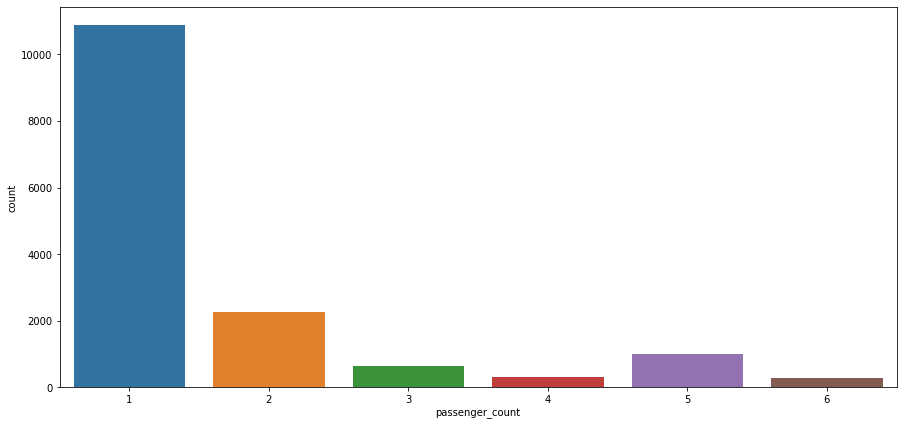

In [46]:
plt.figure(figsize=(15,7))
sns.countplot(x="passenger_count", data=train)

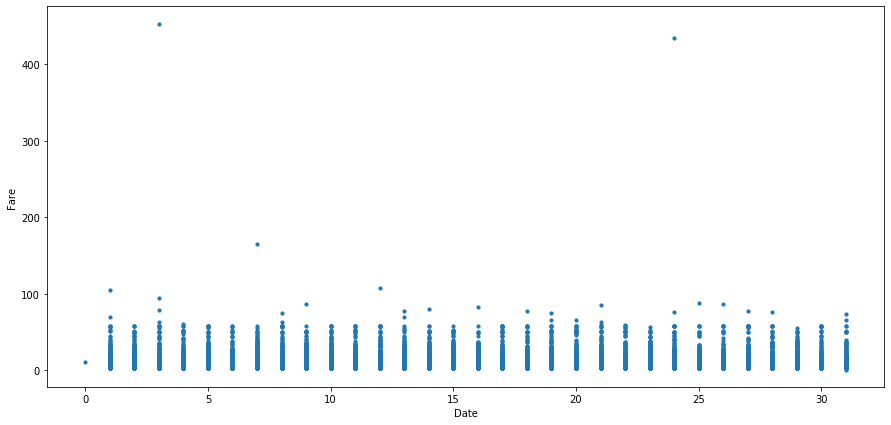

In [47]:
#Relationship between date and Fare
plt.figure(figsize=(15,7))
plt.scatter(x=train['Date'], y=train['fare_amount'], s=10)
plt.xlabel('Date')
plt.ylabel('Fare')
plt.show()


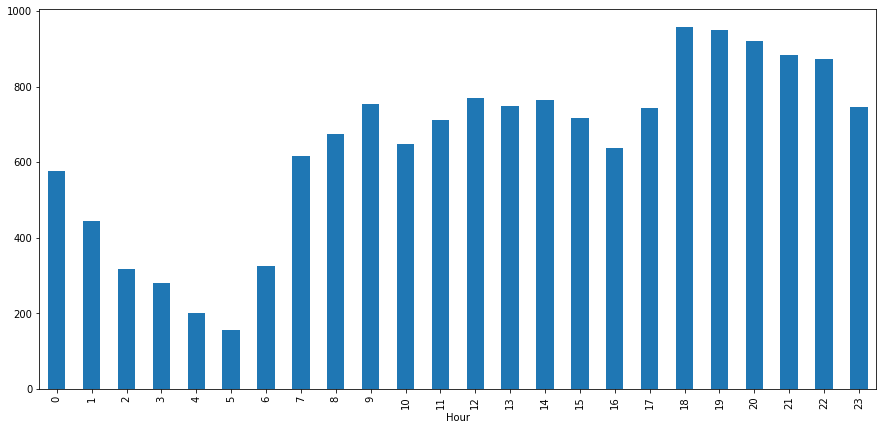

In [48]:
plt.figure(figsize=(15,7))
train.groupby(train["Hour"])['Hour'].count().plot(kind="bar")
plt.show()

  Lowest cabs at 5 AM and highest at and around 7 PM i.e the office rush hours

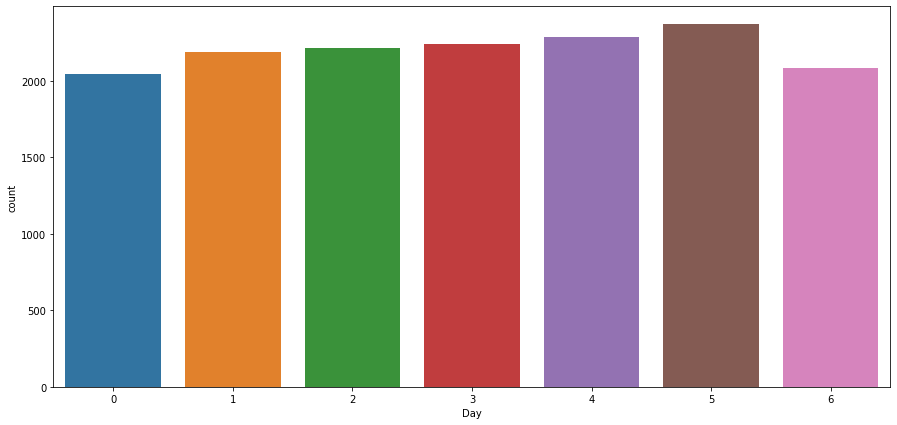

In [49]:
#impact of Day on the number of cab rides
plt.figure(figsize=(15,7))
sns.countplot(x="Day", data=train)

                                              FEATURE SCALING

fare_amount


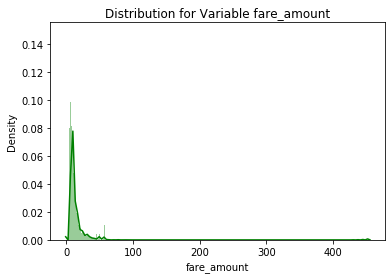

distance


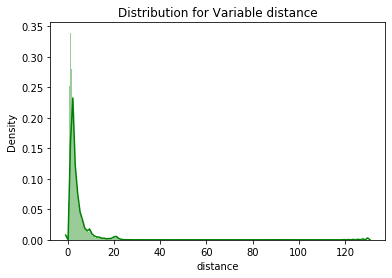

In [50]:
#normality check of train data

for i in ['fare_amount', 'distance']:
    print(i)
    sns.distplot(train[i],bins='auto',color='green')
    plt.title("Distribution for Variable "+i)
    plt.ylabel("Density")
    plt.show()

In [51]:
#since skewness of target variable is high, apply log transform to reduce the skewness-
train['fare_amount'] = np.log1p(train['fare_amount'])

#since skewness of distance variable is high, apply log transform to reduce the skewness-
train['distance'] = np.log1p(train['distance'])

fare_amount


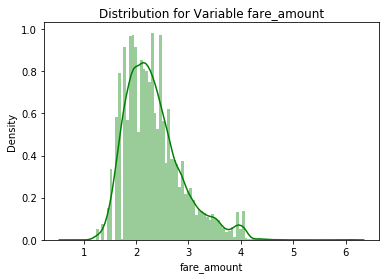

distance


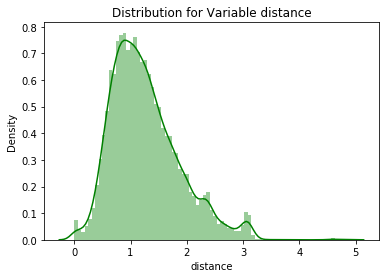

In [52]:
#Normality Re-check to check data is uniformly distributed or not after log transformartion

for i in ['fare_amount', 'distance']:
    print(i)
    sns.distplot(train[i],bins='auto',color='green')
    plt.title("Distribution for Variable "+i)
    plt.ylabel("Density")
    plt.show()

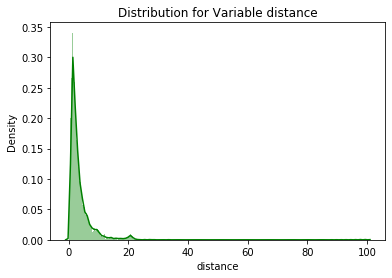

In [53]:
#Normality check for test data is uniformly distributed or not-

sns.distplot(test['distance'],bins='auto',color='green')
plt.title("Distribution for Variable "+i)
plt.ylabel("Density")
plt.show()

In [54]:
#since skewness of distance variable is high, apply log transform to reduce the skewness-
test['distance'] = np.log1p(test['distance'])

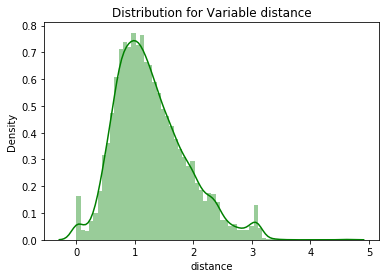

In [55]:
#rechecking the distribution for distance
sns.distplot(test['distance'],bins='auto',color='green')
plt.title("Distribution for Variable "+i)
plt.ylabel("Density")
plt.show()

As we can see a bell shaped distribution. Hence our continous variables are now normally distributed, we will use not use any Feature Scalling technique. i.e, Normalization or Standarization for our test data

                                     IMPLEMENTING THE MACHINE LEARNING MODEL

In [56]:
#train test split for further modelling
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( train.iloc[:, train.columns != 'fare_amount'], 
                         train.iloc[:, 0], test_size = 0.20, random_state = 1)

                                             MULTIPLE LINEAR REGRESSION

In [57]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression().fit(X_train , y_train)

In [58]:
y_pred=regressor.predict(X_test)

In [59]:
#calculating RMSE 
from sklearn.metrics import mean_squared_error
RMSE = np.sqrt(mean_squared_error(y_test,y_pred))


In [60]:
print("Root Mean Squared Error For Test data = "+str(RMSE))

Root Mean Squared Error For Test data = 0.27697660653249345


In [61]:
#calculate R^2 for the model
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.7307447293468052

                                          DECISION TREE MODEL REGRESSION

In [62]:
from sklearn.tree import DecisionTreeRegressor

In [63]:
regressor = DecisionTreeRegressor(max_depth = 2)

In [64]:
regressor.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [65]:
y_pred=regressor.predict(X_test)

In [66]:
#Calculate the RMSE

In [67]:
RMSE = np.sqrt(mean_squared_error(y_test,y_pred))

In [68]:
print("Root Mean Squared Error: "+str(RMSE))

Root Mean Squared Error: 0.30003510877178413


In [69]:
#calculate R^2 for the model
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.6840472156164747

                                            RANDOM FOREST REGRESSOR

In [70]:
from sklearn.ensemble import RandomForestRegressor

In [71]:
regressor = RandomForestRegressor(n_estimators = 200)

In [72]:
regressor.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=200,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [73]:
y_pred=regressor.predict(X_test)

In [74]:
#RMSE
RMSE = np.sqrt(mean_squared_error(y_test,y_pred))

In [75]:
print("Root Mean Squared Error: "+str(RMSE))

Root Mean Squared Error: 0.24521967384015989


In [76]:
#calculate R^2 for the model
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.7889483974792932

                                    BOOSTING ALGORITHM ----GRADIENT BOOSTING

In [77]:
from sklearn.ensemble import GradientBoostingRegressor

In [78]:
regressor = GradientBoostingRegressor()

In [79]:
regressor.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [80]:
y_pred=regressor.predict(X_test)

In [81]:
#calculate RMSE
RMSE = np.sqrt(mean_squared_error(y_test,y_pred))

In [82]:
print("Root Mean Squared Error: "+str(RMSE))

Root Mean Squared Error: 0.23888545459712948


In [83]:
#calculate R^2 for the model
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.7997108390811075

 from the above models,it is clearly visible that both Random Forest Regressor And Gradient Boosting Algorithm gave a very close results of 80%.Lets perform Gridsearch on both models to finetune the parameters

In [84]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 42)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 'warn',
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [85]:
gb = GradientBoostingRegressor(random_state = 42)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(gb.get_params())

Parameters currently in use:

{'alpha': 0.9,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'ls',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'presort': 'auto',
 'random_state': 42,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}


In [86]:
from sklearn.model_selection import GridSearchCV    
## Grid Search CV for random Forest model
regr = RandomForestRegressor(random_state = 0)
n_estimator = list(range(11,20,1))
depth = list(range(5,15,2))

# Create the grid
grid_search = {'n_estimators': n_estimator,
               'max_depth': depth}

## Grid Search Cross-Validation with 5 fold CV
gridcv_rf = GridSearchCV(regr, param_grid = grid_search, cv = 5)
gridcv_rf = gridcv_rf.fit(X_train,y_train)
view_best_params_GRF = gridcv_rf.best_params_

#Apply model on test data
predictions_GRF = gridcv_rf.predict(X_test)

#R^2
GRF_r2 = r2_score(y_test, predictions_GRF)
#Calculating RMSE
GRF_rmse = np.sqrt(mean_squared_error(y_test,predictions_GRF))

print('Grid Search CV Random Forest Regressor Model Performance:')
print('Best Parameters = ',view_best_params_GRF)
print('R-squared = {:0.2}.'.format(GRF_r2))
print('RMSE = ',(GRF_rmse))

Grid Search CV Random Forest Regressor Model Performance:
Best Parameters =  {'max_depth': 7, 'n_estimators': 19}
R-squared = 0.79.
RMSE =  0.2457056406031501


In [ ]:
# Grid Search CV for gradient boosting
gb = GradientBoostingRegressor(random_state = 0)
n_estimator = list(range(11,20,1))
depth = list(range(5,15,2))

# Create the grid
grid_search = {'n_estimators': n_estimator,
               'max_depth': depth}

## Grid Search Cross-Validation with 5 fold CV
gridcv_gb = GridSearchCV(gb, param_grid = grid_search, cv = 5)
gridcv_gb = gridcv_gb.fit(X_train,y_train)
view_best_params_Ggb = gridcv_gb.best_params_

#Apply model on test data
predictions_Ggb = gridcv_gb.predict(X_test)

#R^2
Ggb_r2 = r2_score(y_test, predictions_Ggb)
#Calculating RMSE
Ggb_rmse = np.sqrt(mean_squared_error(y_test,predictions_Ggb))

print('Grid Search CV Gradient Boosting regression Model Performance:')
print('Best Parameters = ',view_best_params_Ggb)
print('R-squared = {:0.2}.'.format(Ggb_r2))
print('RMSE = ',(Ggb_rmse))

                                            CAB FARE PREDICTION 

We will predict using the GridSearchCv For Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV 
regr = RandomForestRegressor(random_state = 0)
n_estimator = list(range(11,20,1))
depth = list(range(5,15,2))

# Create the grid
grid_search = {'n_estimators': n_estimator,
               'max_depth': depth}

## Grid Search Cross-Validation with 5 fold CV
gridcv_rf = GridSearchCV(regr, param_grid = grid_search, cv = 5)
gridcv_rf = gridcv_rf.fit(X_train,y_train)
view_best_params_GRF = gridcv_rf.best_params_

#Apply model on test data
predictions = gridcv_rf.predict(test)

In [ ]:
test['Predicted_fare'] = predictions

In [ ]:
test.head()

In [ ]:
test.to_csv('predictedfare.csv')

                  -----------------------------------------------END-------------------------------